# Lending Club Case Study (EDA)

In this case study, We will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
The data given in the "loan" excel contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

It contains the complete loan data for all loans issued through the time period 2007 to 2011.

We want to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

## Importing required libraries

In [135]:
## import required libraries initially
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

## 1. Loading the past loan data from csv into a dataframe

In [136]:
## Import the past loan data
loan_data = pd.read_csv("loan.csv", sep=',', dtype='unicode')

In [137]:
## preview the data
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [138]:
loan_data.shape

(39717, 111)

In [139]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


#### The loan data has 111 columns and 39717 rows. Now we will try to clean the data and prepare it for analysis

## 2. Cleaning data

#### 2.1 Check if data has missing values

In [140]:
## Check if data has missing values
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### 2.2 Check if data has missing values (in percentage)

In [141]:
#### Check if data has missing values in percentage
missingValuePercentPerColumn = (loan_data.isnull().sum()* 100)/loan_data.shape[0]
missingValuePercentPerColumn

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

#### 2.3 Drop all columns having 70% or more data missing
#### Assumption - Columns having more than 70% of cells as NaN are not useful for our analysis as maximum data in that is missing

In [142]:
## Drop all columns having 70% or more data missing
max_threshold_drop_columns_with_nan = 70
percentage_nan_each_cols=(loan_data.isnull().sum()/loan_data.shape[0] * 100) > max_threshold_drop_columns_with_nan
NaN_Cols_df = percentage_nan_each_cols.to_frame()
NaN_Cols_df = NaN_Cols_df[NaN_Cols_df[0]==True]
col_list = NaN_Cols_df.index.tolist() # listall columns in list
loan_data = loan_data.drop(columns=col_list) # drop all columns from lis
loan_data.shape

(39717, 55)

#### Out of 111 columns only 55 columns are remaining after dropping the columns with low data

#### 2.4 Drop all columns having only 1 unique value as it is not useful for our analysis


In [143]:
## Drop all columns having only 1 unique value as it is not useful for our analysis
unique_values_cols = loan_data.nunique()
columns_with_only_one_value = unique_values_cols[unique_values_cols.values == 1]
loan_data.drop(columns = list(columns_with_only_one_value.index), inplace=True)
loan_data.shape

(39717, 46)

#### We are left with below columns after removing columns

In [144]:
cols = loan_data.columns
cols

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

### 2.5 Assumption: 
##### 1) Customer Behaviour variables that are created after a loan is taken doesn't make sense for our analysis.
##### 2) Also, fields like 'id', 'member_id' & 'url' are not needed as we are doing overall analysis.
##### 3) 'zip_code' values are masked so not useful anymore.
##### 4) 'desc' has too many unique values which can't be analysed
##### 5) columns like 'loan_amnt', 'funded_amnt', 'funded_amnt_inv' have high correlation value and are similar fields. So, keeping just loan_amnt
Therefore, we will drop all these columns mentioned below:

In [145]:
## Customer Behaviour variables that are created after a loan is taken doesn't make sense for our analysis. 
## Also, fields like id, member_id & url are not needed as we are doing overall analysis.
## zip_code values are masked so not useful anymore.
## desc have excessive len which can't be analysed
## columns like loan_amnt, funded_amnt, funded_amnt_inv have high correlation value and
## are similar fields. So, keeping just loan_amnt
## Therefore, we will drop all these columns mentioned below:

drop_irrelevant_cols = ["delinq_2yrs","earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", 
                        "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv", "mths_since_last_delinq", "pub_rec_bankruptcies", "emp_title",
                        "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee", "funded_amnt", "funded_amnt_inv",
                        "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d", "id", "desc", "title", "member_id","url","zip_code",]
loan_data.drop(columns=drop_irrelevant_cols, inplace=True)
loan_data.shape

(39717, 15)

#### 2.6 We are left with below columns after removing the columns

In [146]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti'],
      dtype='object')

#### 2.7 Keeping useful columns and creating a copy of dataframe for our analysis

In [147]:
## Keeping useful columns
relevant_cols = loan_data.columns
final_loan_data = loan_data[relevant_cols].copy()
final_loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,car,GA,1
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,other,CA,20
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000,Source Verified,Dec-11,Current,other,OR,17.94


#### 2.8 Cleaning rows
#### Drop all rows having "loan status" as "current" as we can't make any decision based on it.

In [148]:
## Drop all rows having loan status as current as we can't make any decision based on it.
final_loan_data = final_loan_data[final_loan_data.loan_status!='Current'].reset_index(drop=True)
final_loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### 2.9 Checking for missing values in current dataframe after removing unwanted columns and rows

In [149]:
### Data Cleaning - missing values fill 
final_loan_data.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
dtype: int64

#### emp_length column has 1033 missing values.
### 2.10 Fill missing Values
- Assumption: Employment length is a categorical variable. We calculate the mode of it  
- We will replace all the missing values with Mode. 

In [150]:
##Assumption - We take employment length as a categorical variable. We calculate the mode of it 
##and replace all the missing values with it. 

emp_len_mode = final_loan_data.emp_length.mode()
emp_len_mode[0]

'10+ years'

#### And replace all the missing values with it. 

In [151]:
final_loan_data['emp_length'].fillna(final_loan_data['emp_length'].mode()[0], inplace=True)
final_loan_data.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

## 3. Data Formatting
### 3.1 Correcting the data types of below columns: loan_amnt, annual_inc, installment & dti

In [152]:
final_loan_data['int_rate'] = final_loan_data['int_rate'].str.replace('%', '').astype(float)
final_loan_data['loan_amnt'] = final_loan_data['loan_amnt'].astype(int)
final_loan_data['annual_inc'] = final_loan_data['annual_inc'].astype(float)
final_loan_data['installment'] = final_loan_data['installment'].astype(float)
final_loan_data['dti'] = final_loan_data['dti'].astype(float)
final_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int32  
 1   term                 38577 non-null  object 
 2   int_rate             38577 non-null  float64
 3   installment          38577 non-null  float64
 4   grade                38577 non-null  object 
 5   sub_grade            38577 non-null  object 
 6   emp_length           38577 non-null  object 
 7   home_ownership       38577 non-null  object 
 8   annual_inc           38577 non-null  float64
 9   verification_status  38577 non-null  object 
 10  issue_d              38577 non-null  object 
 11  loan_status          38577 non-null  object 
 12  purpose              38577 non-null  object 
 13  addr_state           38577 non-null  object 
 14  dti                  38577 non-null  float64
dtypes: float64(4), int32(1), object(10)


#### 3.2 Creating new columns for month and year seperately using issue_d
#### As loans issued through the time period 2007 to 2011, so we prefixing '20' in the year value from issue_d
#### Also, we drop the issue_d column as its not needed anymore

In [154]:
## Extracting the month and year from the issue_d date
final_loan_data["issue_d_month"] = final_loan_data["issue_d"].apply(lambda x: x.split("-")[0])
final_loan_data["issue_d_year"] = final_loan_data["issue_d"].apply(lambda x: "20"+x.split("-")[1])

## we drop the original issue date
final_loan_data.drop(columns=['issue_d'], inplace=True)

### 4. Creating categorical and continous column list which will be handy for analysis

In [158]:
categorical_cols = ['term', 'grade', 'sub_grade',
       'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state',
       'issue_d_month', 'issue_d_year', 'loan_status']
continuous_cols = ['annual_inc','loan_amnt','int_rate','dti', 'installment']

## 5. Check for outliers and remove them

In [156]:
### Distribution of data 
final_loan_data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti
count,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000
mean,11047.025430,11.932219,322.466318,6.877797e+04,13.272727
std,7348.441646,3.691327,208.639215,6.421868e+04,6.673044
min,500.000000,5.420000,15.690000,4.000000e+03,0.000000
25%,5300.000000,8.940000,165.740000,4.000000e+04,8.130000
50%,9600.000000,11.710000,277.860000,5.886800e+04,13.370000
75%,15000.000000,14.380000,425.550000,8.200000e+04,18.560000
max,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000


## 7. let us check for Outliers using box plot on continous variable

### plot boxplot to check for outliers

------------ annual_inc ------------------


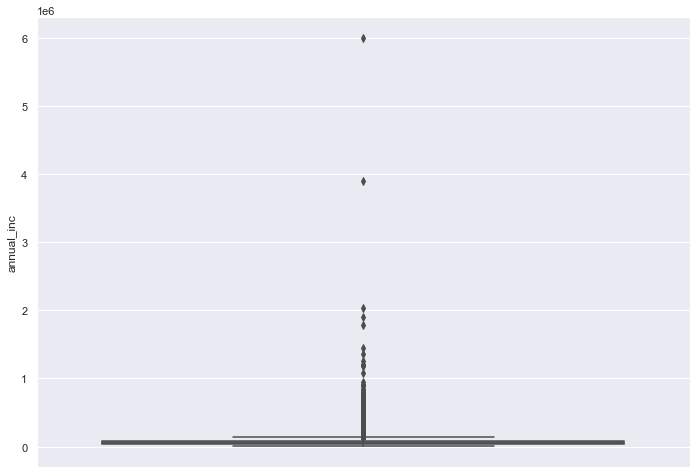

------------ loan_amnt ------------------


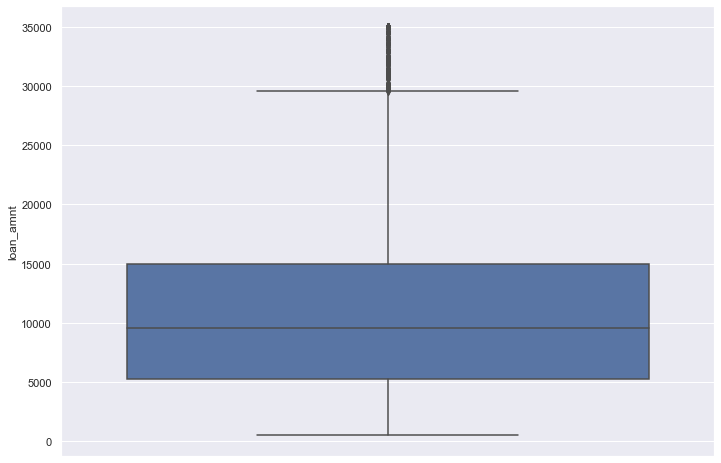

------------ int_rate ------------------


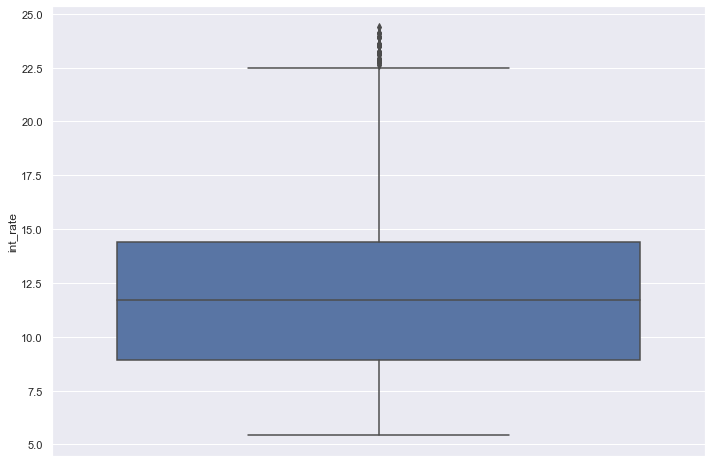

------------ dti ------------------


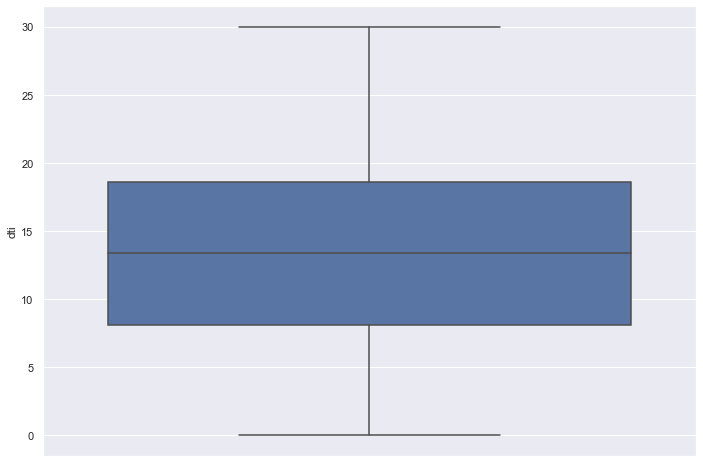

------------ installment ------------------


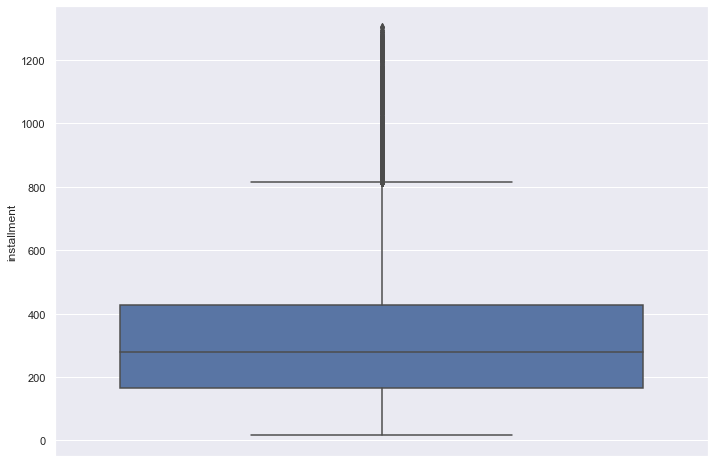

In [159]:
for col in continuous_cols:
    print("------------", col ,"------------------")
    sns.boxplot(y=final_loan_data[col])
    plt.show()

In [160]:
final_loan_data['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

### Removing outlier - Annual Income has outlier, so we should remove the outliers

In [161]:
#annual_income_upper_limit = Q3_annual_income(75%) + 1.5* IQR_annual_income (difference)
#75%= 82000 from above table
#25% =40000 
quantile_breakup = final_loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_breakup

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [162]:
Q3_annual_income = final_loan_data['annual_inc'].quantile(0.75)
Q1_annual_income = final_loan_data['annual_inc'].quantile(0.25)
IQR_annual_income = Q3_annual_income - Q1_annual_income

In [163]:
## Upper threshold
annual_income_upper_limit = Q3_annual_income + 1.5*IQR_annual_income
annual_income_upper_limit

145000.0

In [164]:
#get all records where annual income is less than maximum as per IQR
final_loan_data = final_loan_data[final_loan_data['annual_inc'] < annual_income_upper_limit]
final_loan_data.shape

(36754, 16)

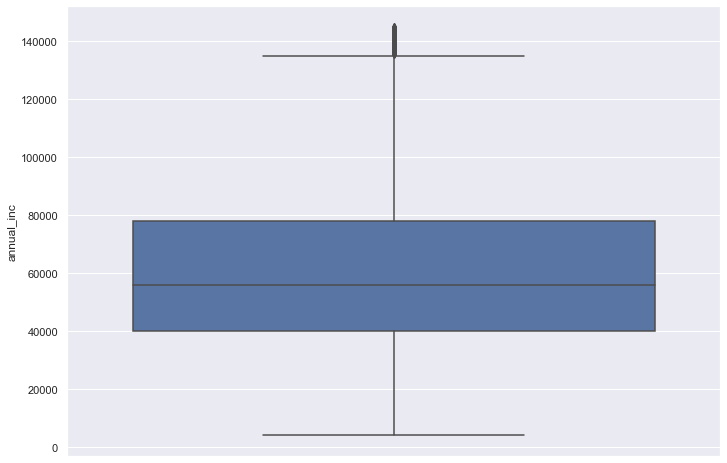

In [165]:
sns.boxplot(y=final_loan_data["annual_inc"])
plt.show()

#### All outliers are now removed and data is ready for analysis

### 8. Data Visualization
#### We have cleaned the data. Now we will try and understand the data with some charts/graphs

In [166]:
### Data Visualization
### We have cleaned the data. Now we will try and understand the data with some charts/graphs
final_loan_data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti
count,36754.000000,36754.000000,36754.000000,36754.000000,36754.000000
mean,10696.825516,11.888697,312.324623,61079.142225,13.439892
std,7060.951959,3.668730,199.618704,28040.679299,6.660922
min,500.000000,5.420000,15.690000,4000.000000,0.000000
25%,5000.000000,8.940000,163.110000,40000.000000,8.340000
50%,9250.000000,11.710000,270.910000,56000.000000,13.570000
75%,15000.000000,14.270000,409.290000,78000.000000,18.700000
max,35000.000000,24.400000,1305.190000,144997.000000,29.990000


------------- term --------------


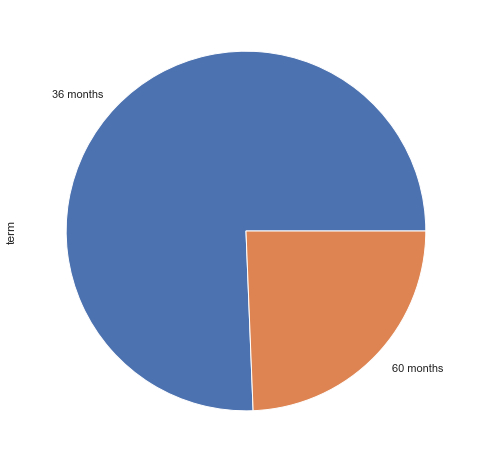

------------- grade --------------


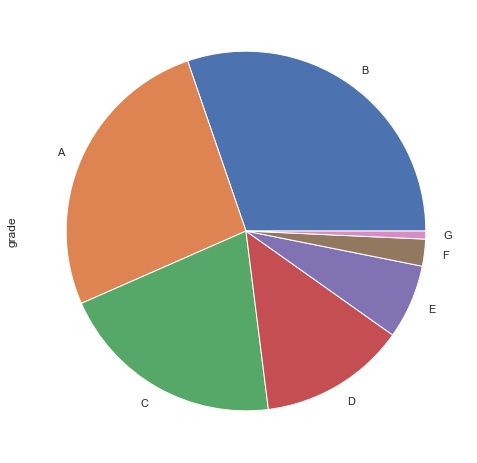

------------- sub_grade --------------


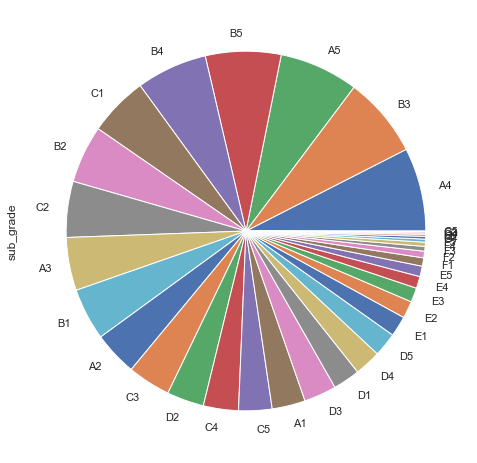

------------- emp_length --------------


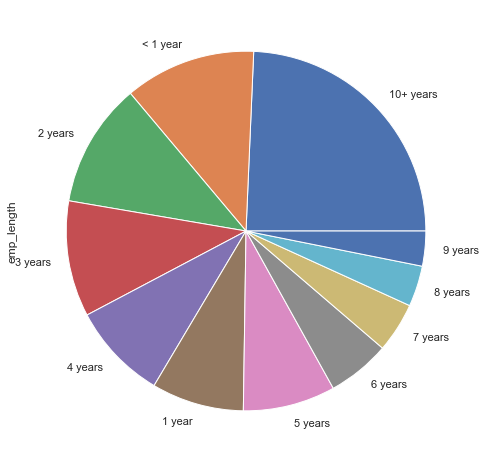

------------- home_ownership --------------


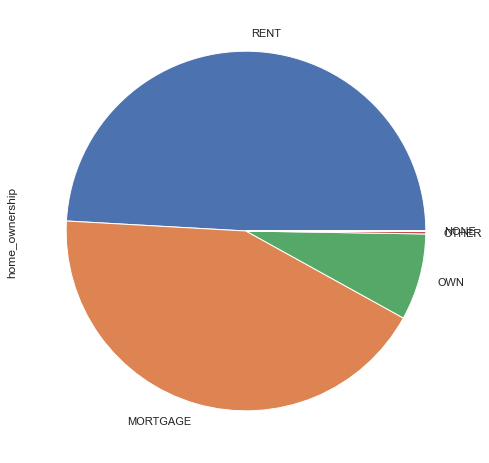

------------- verification_status --------------


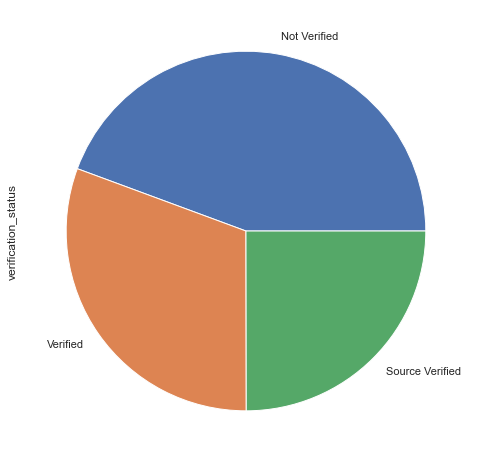

------------- purpose --------------


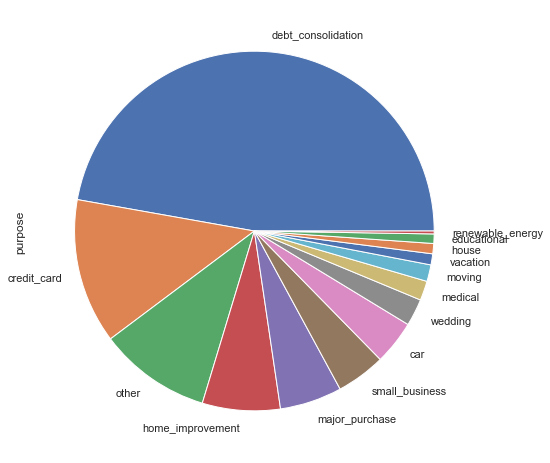

------------- addr_state --------------


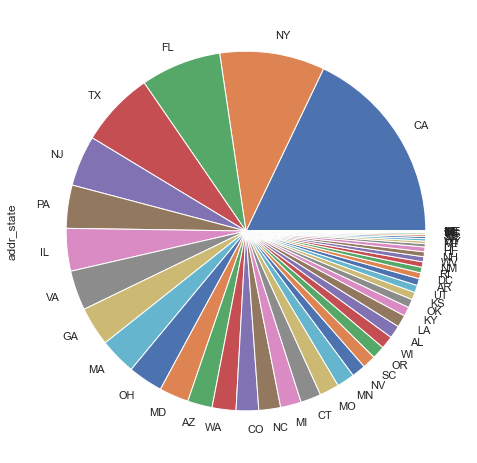

------------- issue_d_month --------------


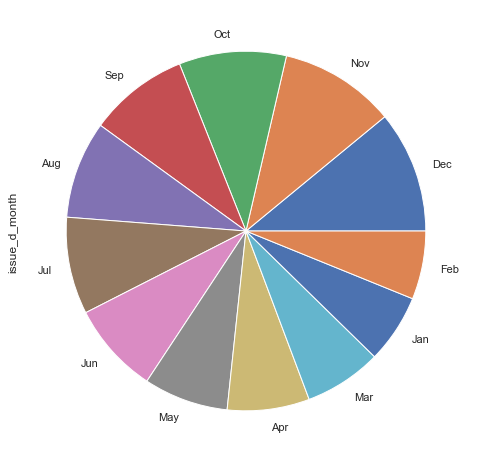

------------- issue_d_year --------------


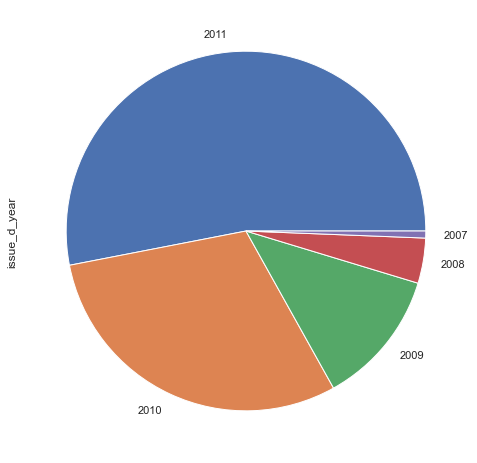

------------- loan_status --------------


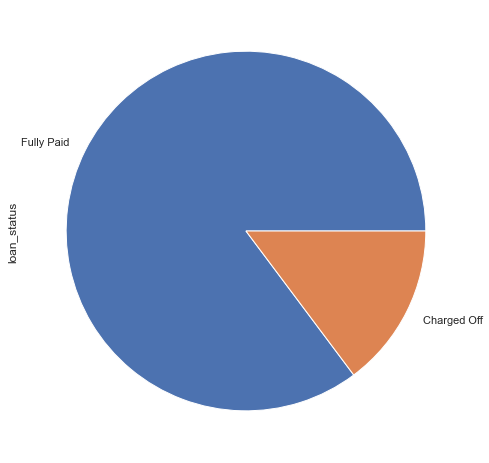

In [167]:
for col_name in categorical_cols:
        print("-------------", col_name, "--------------")
        (final_loan_data[col_name].value_counts(normalize=True)*100).plot(kind='pie', figsize=(11.7, 8.27))
        plt.show()

------------- term --------------


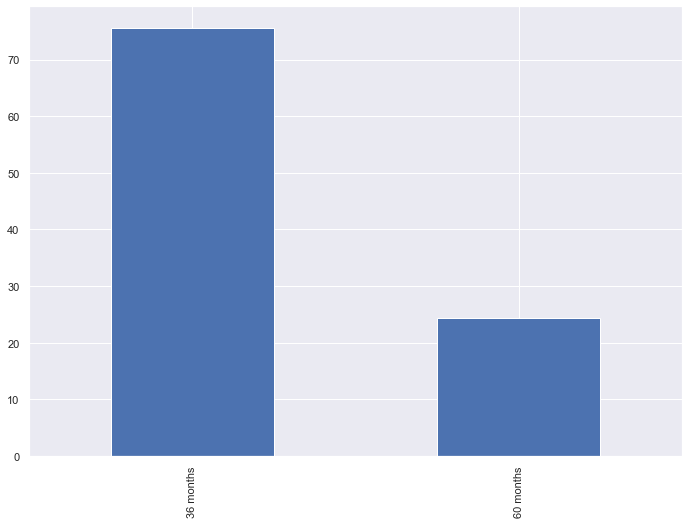

------------- grade --------------


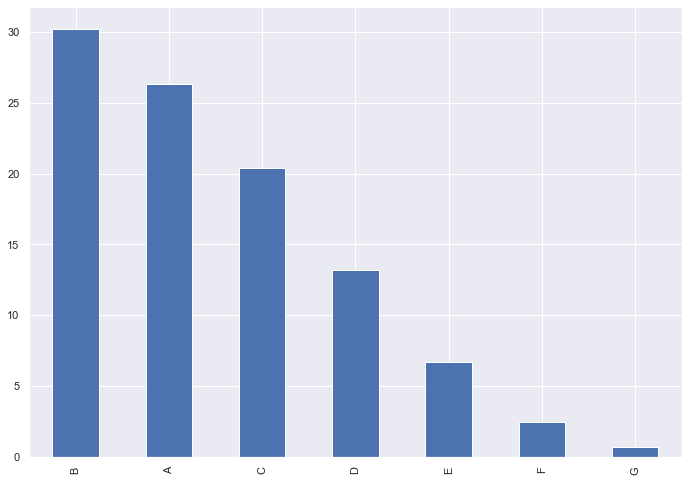

------------- sub_grade --------------


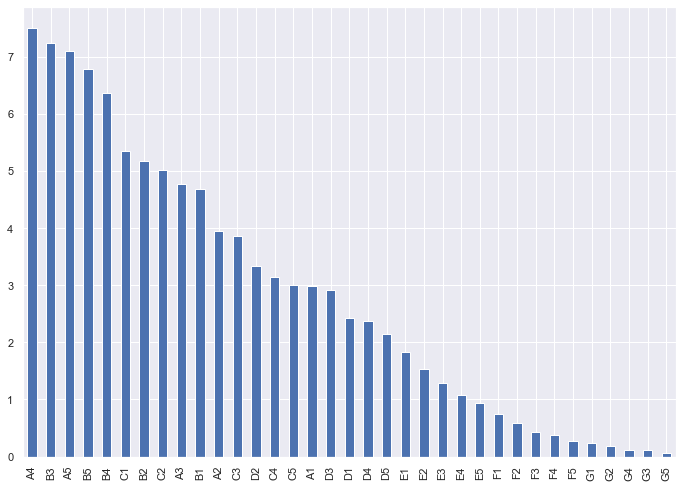

------------- emp_length --------------


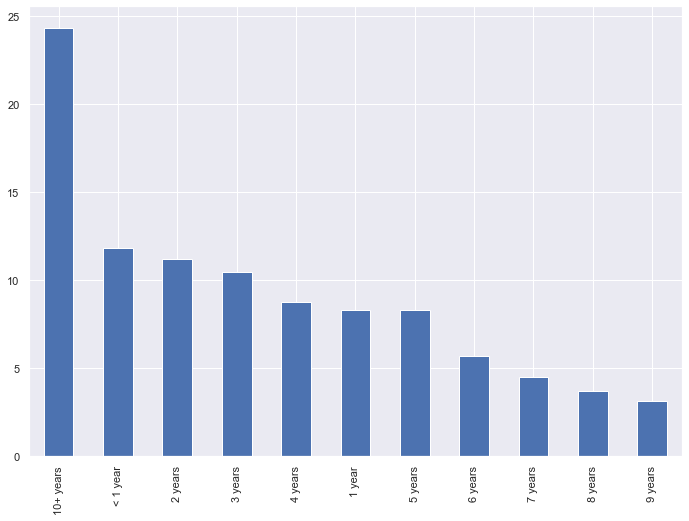

------------- home_ownership --------------


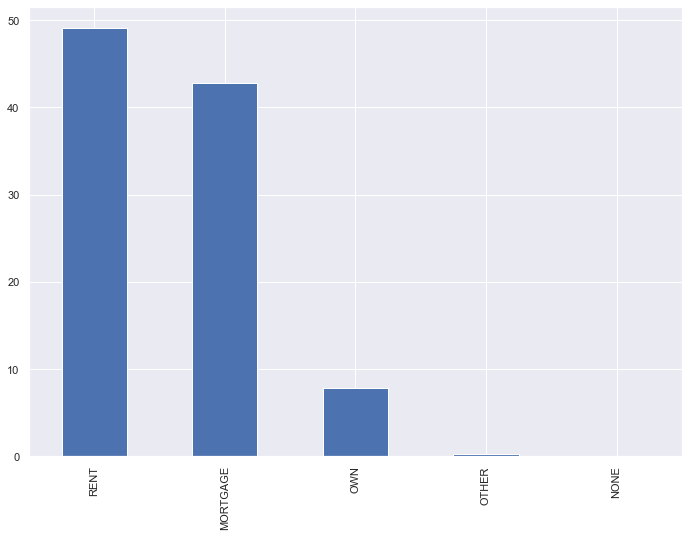

------------- verification_status --------------


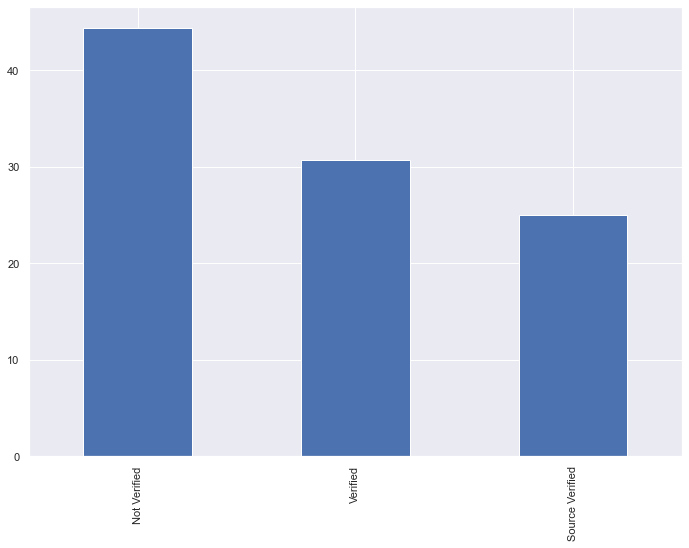

------------- purpose --------------


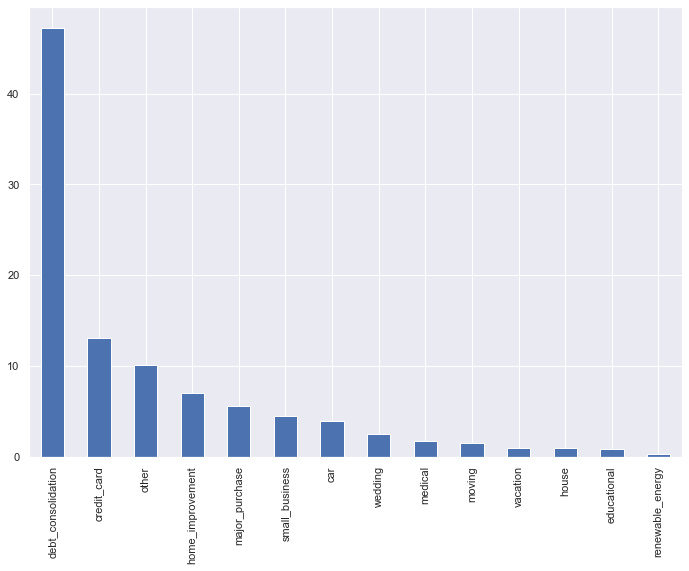

------------- addr_state --------------


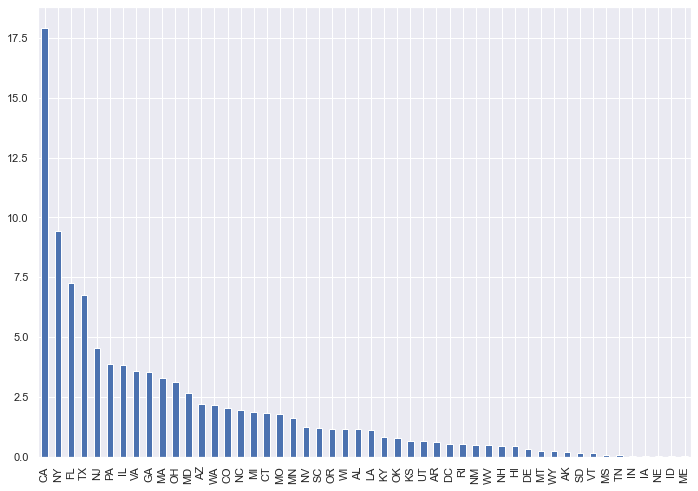

------------- issue_d_month --------------


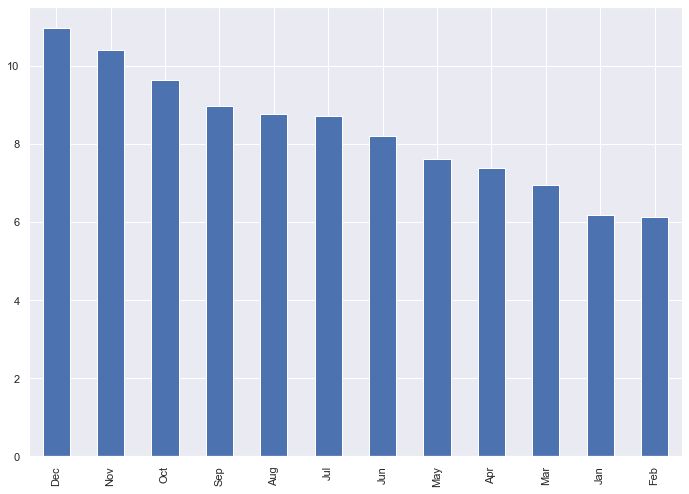

------------- issue_d_year --------------


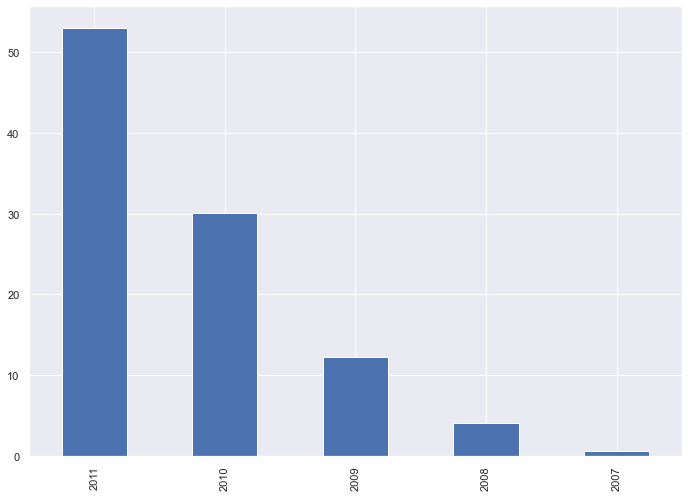

------------- loan_status --------------


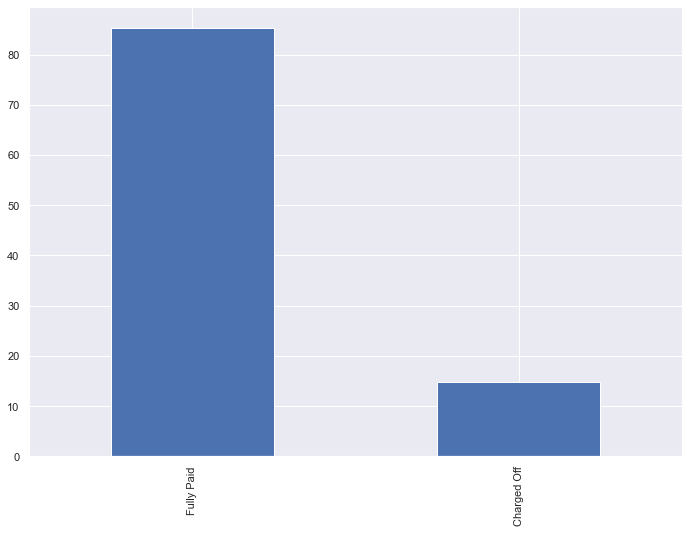

In [168]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for col_name in categorical_cols:
    print("-------------", col_name, "--------------")
    (final_loan_data[col_name].value_counts(normalize=True)*100).plot(kind='bar', figsize=(11.7, 8.27))
    plt.show()

### Observation: 
#### Here are our observations about the categorical variables in the data: 
- Loans are given for 2 terms (36 months and 60 months). Above 70% of the total loans are given for 36 months (3 years)
- Maximum loans are given with Grade B followed by A and C, then D,E,F and very few with G.
- Maximum loan are given with sub-grade A4 and then B3
- Maximum number of loans were given to perons with employment length '10+ years'
- Home ownership is highest for - 'RENT'
- Maximum loans given are 'NOT VERIFIED'
- Maximum loans were given for the purpose - 'debt_consolidation'
- Maximum loans are given for the state - 'CA' (California)
- Maximum loans are given for the month of Dec
- Maximum loans are given for the year 2011
- Maximum loans given out were 'Fully Paid' (around 85%) and only around 15% were "Charged-Off".


## 9. Univariant analysis  
### - Categorical variables

#### We analyse for "loan status as Charged off" and how its is dependent on other variables

In [169]:
df_chargedOffOnly = final_loan_data[final_loan_data["loan_status"]=="Charged Off"].copy()
df_chargedOffOnly["loan_status"].value_counts()

Charged Off    5429
Name: loan_status, dtype: int64

-----------------  term  -----------------


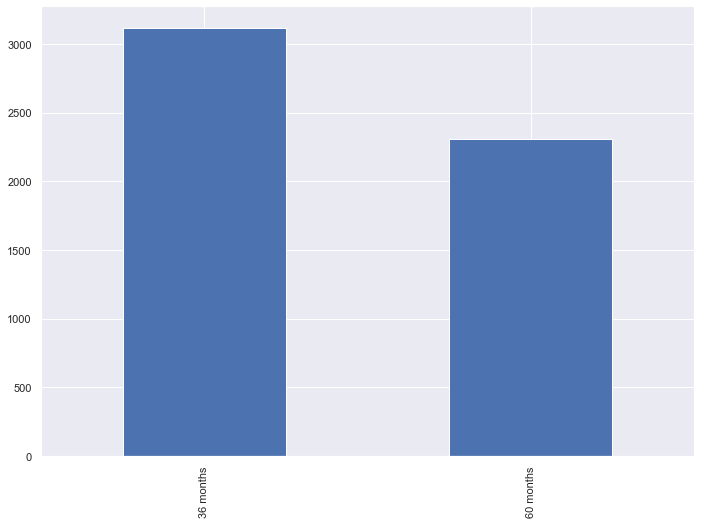

-----------------  grade  -----------------


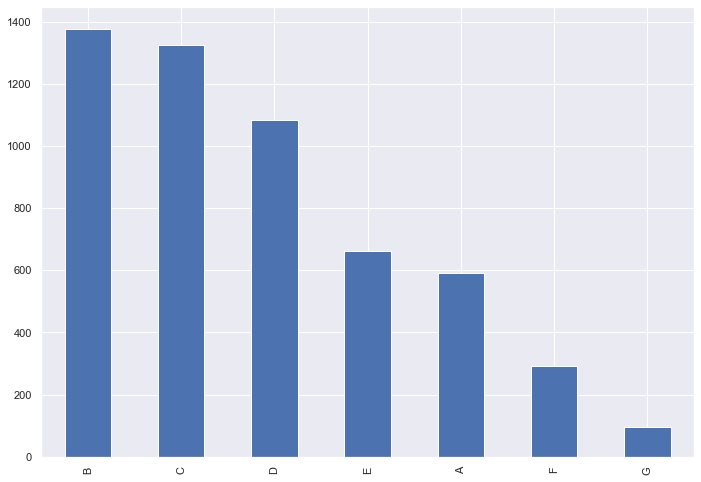

-----------------  sub_grade  -----------------


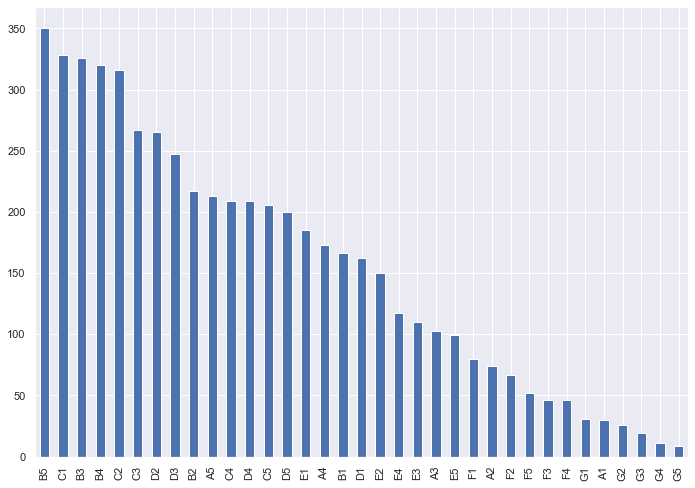

-----------------  emp_length  -----------------


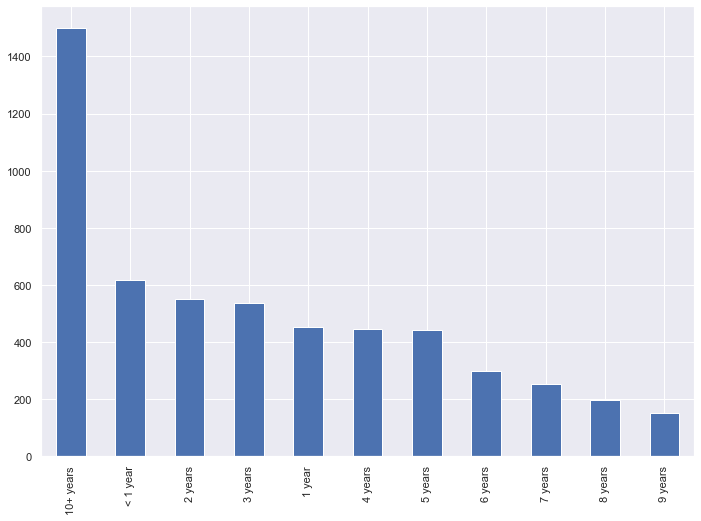

-----------------  home_ownership  -----------------


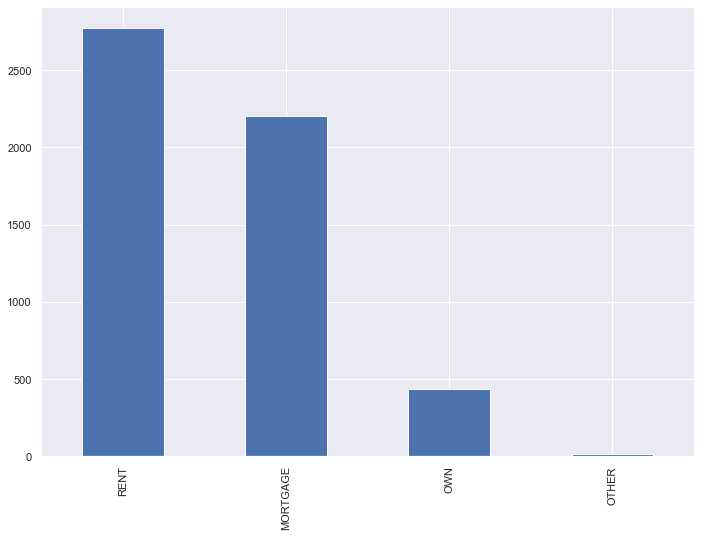

-----------------  verification_status  -----------------


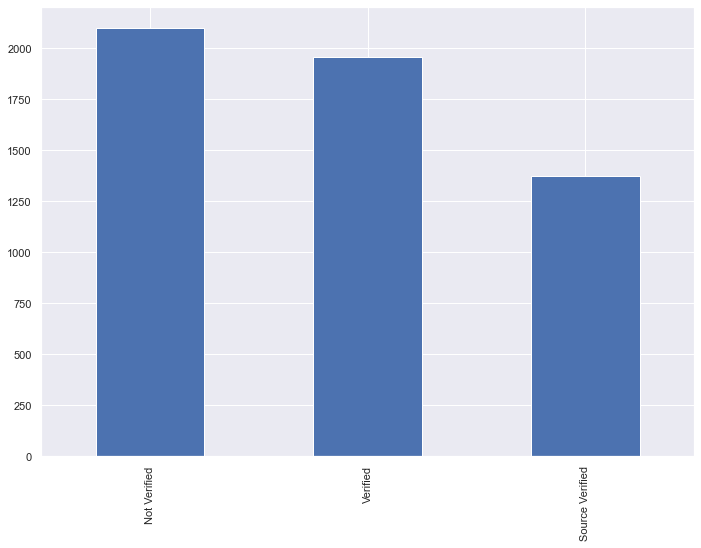

-----------------  purpose  -----------------


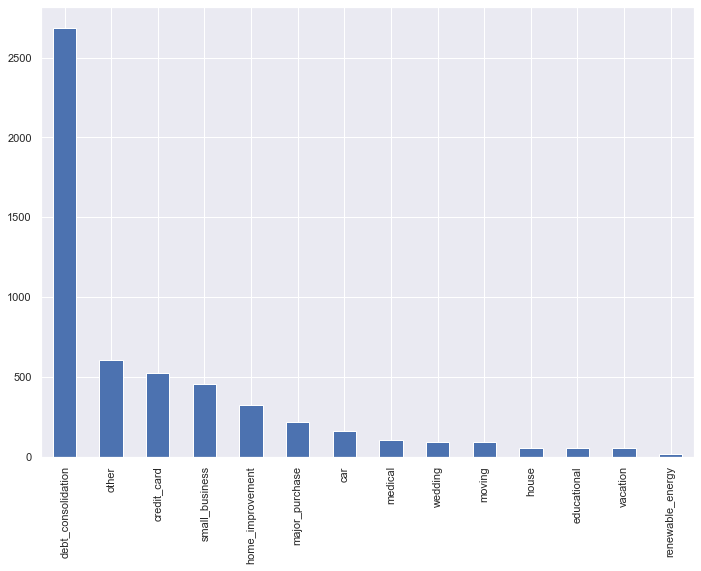

-----------------  addr_state  -----------------


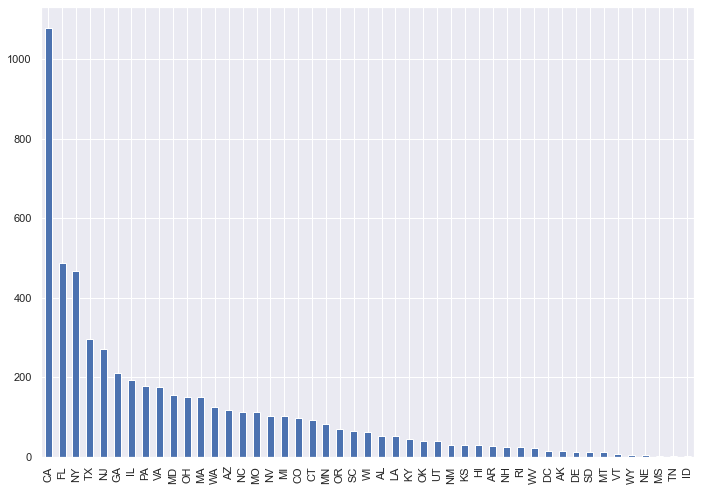

-----------------  issue_d_month  -----------------


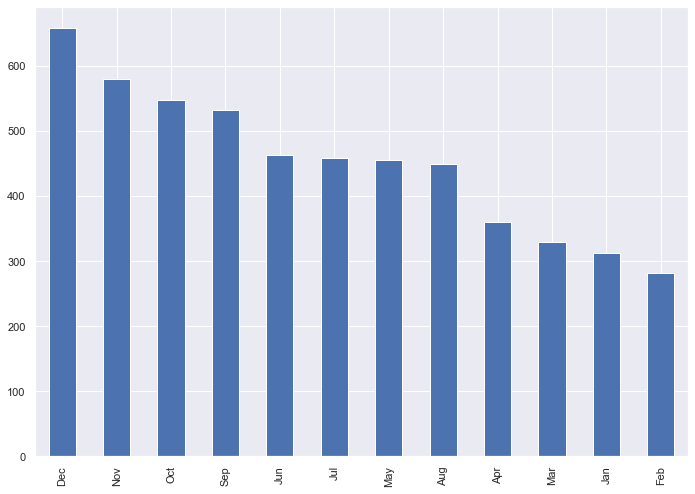

-----------------  issue_d_year  -----------------


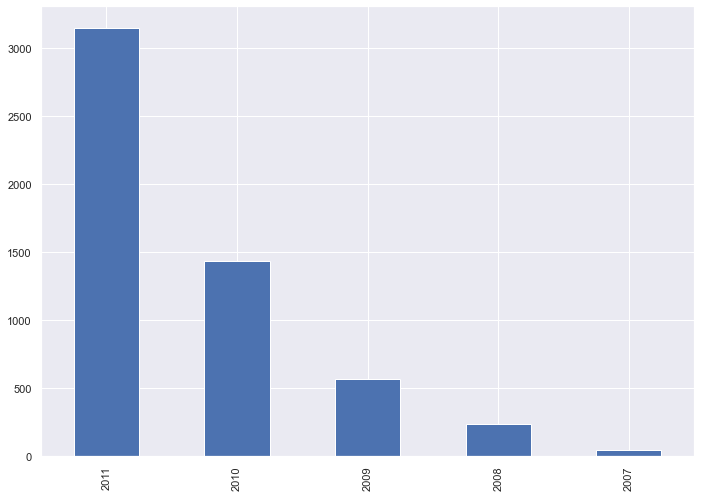

-----------------  loan_status  -----------------


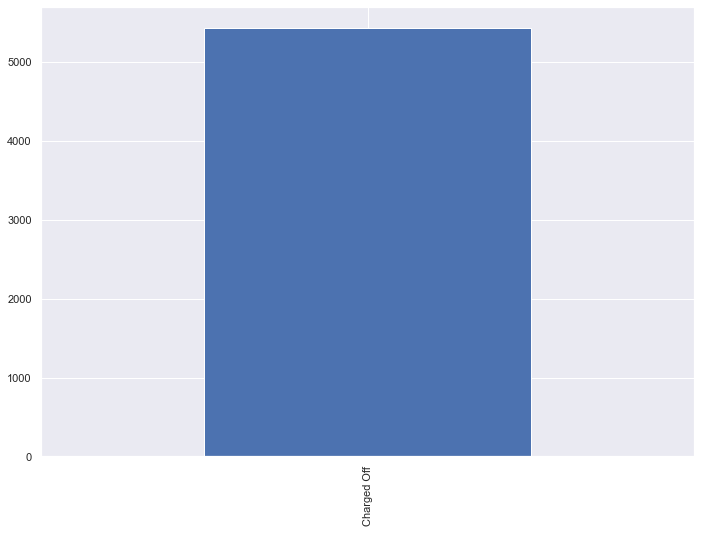

In [170]:
for col in categorical_cols:
    print("----------------- " , col , " -----------------")
    df_chargedOffOnly[col].value_counts().plot(kind="bar")
    plt.show()

### Observations from univariant analysis (Categorical Variables)


### We have most loan with status "Charged off"  in following categories:
     - when term = 36 months i.e number of payments on the loan is '36 months'
     - When Grade = B i.e when LC assigned loan grade is 'B'
     - When Sub Grage = B5 i.e when LC assinged loan grade is 'B5'
     - When Employee length = '10+ years' i.e when employment length/experience of the person is 10+ years
     - When the home ownership provided by the person is 'RENT'
     - When verification status is 'Not verified'
     - When the purpose for the loan is 'debt consolidation'
     - When address state is 'CA'
     - when loan was issue in 'Dec' month
     - Number of loans are increasing every year, max loans were given in '2011'
     
But this doesn't necessarily mean these conditions lead to default as its just frequency for each bucket and not normalized 

## 10. Segmented univariant analysis

### - Numeric / Continuous variables Analysis

#### creating bins for below columns and checking for frequency
 - loan_amnt
 - int_rate              
 - annual_inc
 - dti
 - monthly installments

<AxesSubplot:ylabel='Frequency'>

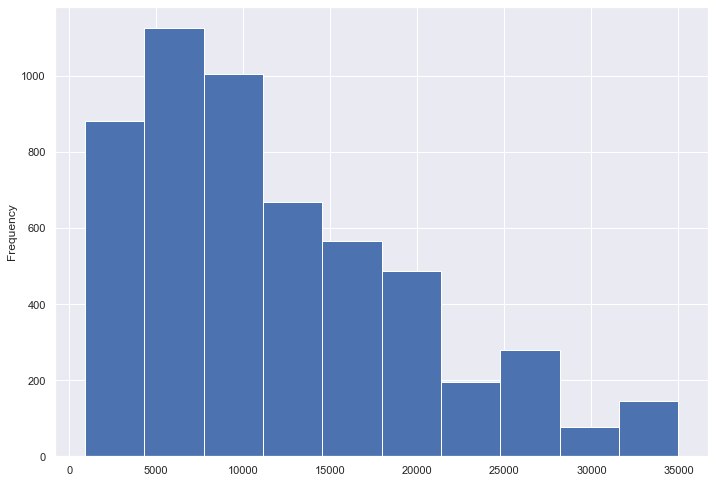

In [171]:
df_chargedOffOnly["loan_amnt"].plot(kind="hist",bins=10)

### using min, std and max to create bins

In [172]:
for col in continuous_cols:
    print(col,": std -", df_chargedOffOnly[col].std(), "; min", "-", df_chargedOffOnly[col].min(), "; max","-",df_chargedOffOnly[col].max())

annual_inc : std - 26840.859717836447 ; min - 4080.0 ; max - 144500.0
loan_amnt : std - 7902.484840473637 ; min - 900 ; max - 35000
int_rate : std - 3.633681978861745 ; min - 5.42 ; max - 24.4
dti : std - 6.5847525693698135 ; min - 0.0 ; max - 29.85
installment : std - 210.97667142179807 ; min - 22.79 ; max - 1305.19


#### 10.1 Loan Amount

In [173]:
#loan_amnt : std - 7902.484840473637 ; min - 900 ; max - 35000
df_chargedOffOnly["loan_amnt_bin"] = pd.cut(df_chargedOffOnly["loan_amnt"],bins=[0,7000,14000,21000,28000,35000]) 

In [174]:
# check for bin column
df_chargedOffOnly.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_d_month,issue_d_year,loan_amnt_bin
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,Dec,2011,"(0, 7000]"
7,5600,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Charged Off,small_business,CA,5.55,Dec,2011,"(0, 7000]"
8,5375,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Charged Off,other,TX,18.08,Dec,2011,"(0, 7000]"
11,9000,36 months,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,VA,10.08,Dec,2011,"(7000, 14000]"
13,10000,36 months,10.65,325.74,B,B2,3 years,RENT,100000.0,Source Verified,Charged Off,other,CA,7.06,Dec,2011,"(7000, 14000]"


<AxesSubplot:>

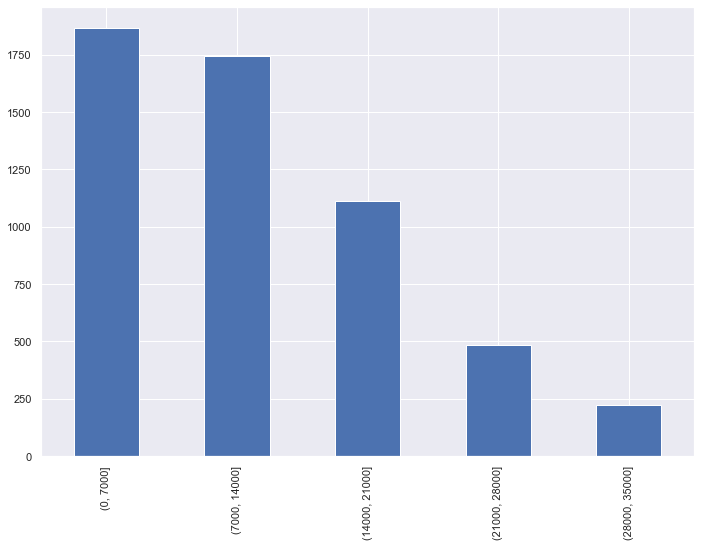

In [175]:
df_chargedOffOnly["loan_amnt_bin"].value_counts().plot(kind="bar")

### Above we can see that when loan amount of 0 to 7000 has high chances of defaulting

### 10.2 Interest Rate

In [176]:
#int_rate : std - 3.633681978861745 ; min - 5.42 ; max - 24.4
df_chargedOffOnly["int_rate_bin"] = pd.cut(df_chargedOffOnly["int_rate"],bins=[5.5,9.5,13.5,18.5,23.5,27.5]) # adding min  = 5.5 (rouded) with 4 (std rounded)
# check for bin column
df_chargedOffOnly.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_d_month,issue_d_year,loan_amnt_bin,int_rate_bin
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,Dec,2011,"(0, 7000]","(13.5, 18.5]"
7,5600,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Charged Off,small_business,CA,5.55,Dec,2011,"(0, 7000]","(18.5, 23.5]"
8,5375,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Charged Off,other,TX,18.08,Dec,2011,"(0, 7000]","(9.5, 13.5]"
11,9000,36 months,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,VA,10.08,Dec,2011,"(7000, 14000]","(9.5, 13.5]"
13,10000,36 months,10.65,325.74,B,B2,3 years,RENT,100000.0,Source Verified,Charged Off,other,CA,7.06,Dec,2011,"(7000, 14000]","(9.5, 13.5]"


<AxesSubplot:>

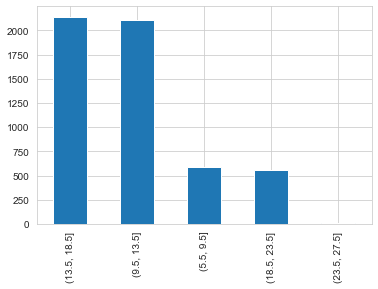

In [341]:
df_chargedOffOnly["int_rate_bin"].value_counts().plot(kind="bar")

### Above we can see if interest rate is between 13.5 to 18.5 chances of defaulting is higher. Also for 9.5 to 13.5

### 10.3 Annual Income

In [177]:
#annual_inc : std - 26840.859717836447 ; min - 4080.0 ; max - 144500.0
df_chargedOffOnly["annual_inc_bin"] = pd.cut(df_chargedOffOnly["annual_inc"],bins=[4080, 30080,56080, 82080, 108080,134080,160080,186080])
# check for bin column
df_chargedOffOnly.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_d_month,issue_d_year,loan_amnt_bin,int_rate_bin,annual_inc_bin
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,Dec,2011,"(0, 7000]","(13.5, 18.5]","(4080, 30080]"
7,5600,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Charged Off,small_business,CA,5.55,Dec,2011,"(0, 7000]","(18.5, 23.5]","(30080, 56080]"
8,5375,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Charged Off,other,TX,18.08,Dec,2011,"(0, 7000]","(9.5, 13.5]","(4080, 30080]"
11,9000,36 months,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,VA,10.08,Dec,2011,"(7000, 14000]","(9.5, 13.5]","(4080, 30080]"
13,10000,36 months,10.65,325.74,B,B2,3 years,RENT,100000.0,Source Verified,Charged Off,other,CA,7.06,Dec,2011,"(7000, 14000]","(9.5, 13.5]","(82080, 108080]"


<AxesSubplot:>

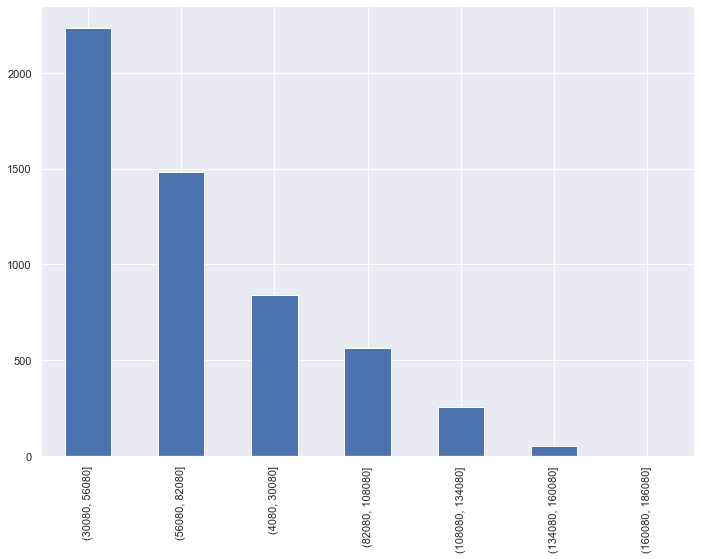

In [178]:
df_chargedOffOnly["annual_inc_bin"].value_counts().plot(kind="bar")

### Above we can see if annual income between 30080 to 56080 has higher chances of defaulting

### 10.4 DTI

In [179]:
#let us check for dti
#dti : std - 6.5847525693698135 ; min - 0.0 ; max - 29.85
df_chargedOffOnly["dti_bin"] = pd.cut(df_chargedOffOnly["dti"],bins=[0.0,6.5,13,19.5,26,32.5])
# check for bin column
df_chargedOffOnly.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_d_month,issue_d_year,loan_amnt_bin,int_rate_bin,annual_inc_bin,dti_bin
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,Dec,2011,"(0, 7000]","(13.5, 18.5]","(4080, 30080]","(0.0, 6.5]"
7,5600,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Charged Off,small_business,CA,5.55,Dec,2011,"(0, 7000]","(18.5, 23.5]","(30080, 56080]","(0.0, 6.5]"
8,5375,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Charged Off,other,TX,18.08,Dec,2011,"(0, 7000]","(9.5, 13.5]","(4080, 30080]","(13.0, 19.5]"
11,9000,36 months,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,VA,10.08,Dec,2011,"(7000, 14000]","(9.5, 13.5]","(4080, 30080]","(6.5, 13.0]"
13,10000,36 months,10.65,325.74,B,B2,3 years,RENT,100000.0,Source Verified,Charged Off,other,CA,7.06,Dec,2011,"(7000, 14000]","(9.5, 13.5]","(82080, 108080]","(6.5, 13.0]"


<AxesSubplot:>

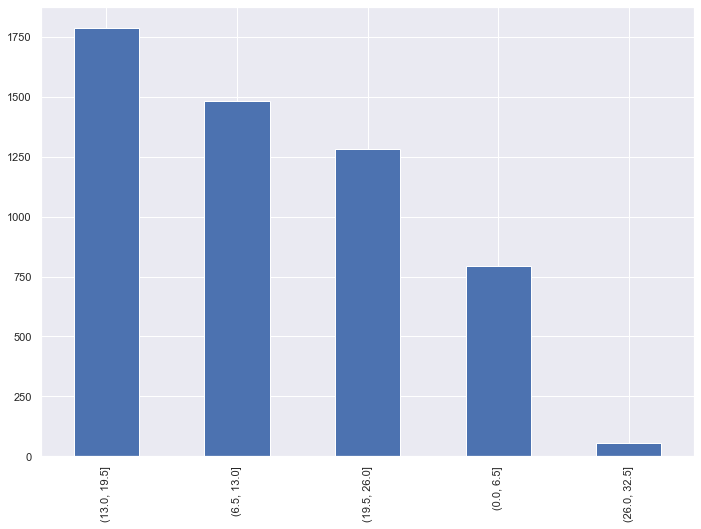

In [180]:
df_chargedOffOnly["dti_bin"].value_counts().plot(kind="bar")

### 10.5 Monthly Installments

In [181]:
## Monthly installments
## std - 210.97667142179807 ; min - 22.79 ; max - 1305.19
df_chargedOffOnly['installment_bin'] = pd.cut(df_chargedOffOnly['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])

<AxesSubplot:>

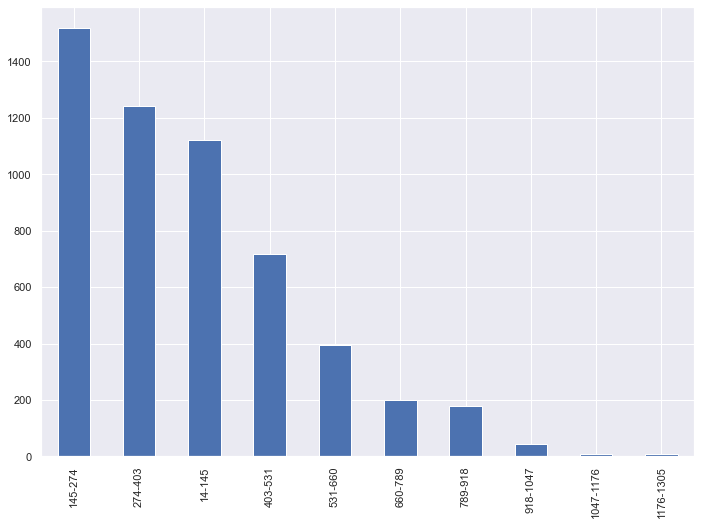

In [182]:
df_chargedOffOnly["installment_bin"].value_counts().plot(kind="bar")

#### Above we can see if DTI is between 13.0% to 19.5% then chances of defaulting is higher

### Observations from univariant analysis (Continous Variables)

### We have most loan with status "Charged off"  in following categories - 

- Applicants who receive interest at the rate of 13.5-18.5
- Applicants who have an income of range 30800-56080
- Loan amount is between 0 - 7000
- Dti is between 13-19.5
- When monthly installments are between 145-274

# Bivariant Analysis

In [183]:
#Let us check correlation table
df_chargedOffOnly[continuous_cols].corr()

,annual_inc,loan_amnt,int_rate,dti,installment
annual_inc,1.000000,0.461592,0.155932,-0.028853,0.457881
loan_amnt,0.461592,1.000000,0.341147,0.078098,0.926920
int_rate,0.155932,0.341147,1.000000,0.042448,0.318622
dti,-0.028853,0.078098,0.042448,1.000000,0.054741
installment,0.457881,0.926920,0.318622,0.054741,1.000000


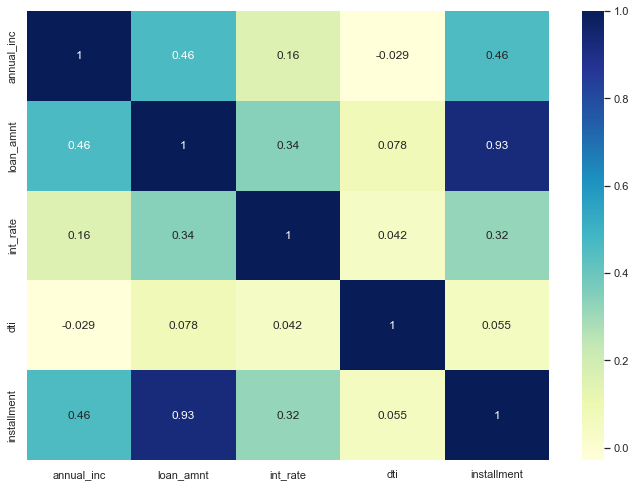

In [184]:
corr_data = df_chargedOffOnly[continuous_cols].corr()
sns.heatmap(data=corr_data,annot=True,cmap="YlGnBu")
plt.show()

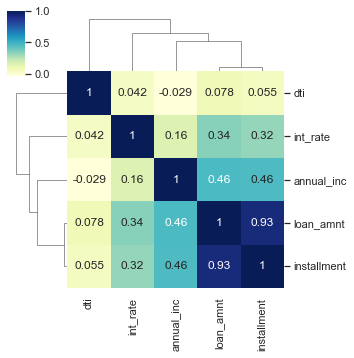

In [185]:
sns.set_style("whitegrid")
sns.clustermap(data=df_chargedOffOnly.corr(),annot=True, cmap='YlGnBu', figsize=(5,5))
plt.show()

#### from heat map we can know
1. Interest rate has positive correlation with loan amount
2. Loan amount is highly correlated with installment
2. DTI has negative correlation with annual income
3. DTI has small positive correlation with loan amount and installment
4. Annual income has positive correlation with installment, loan amount
5. Annual income has negative correlation with DTI

### Let us check for categorical variables vs loan_status

------------- term --------------


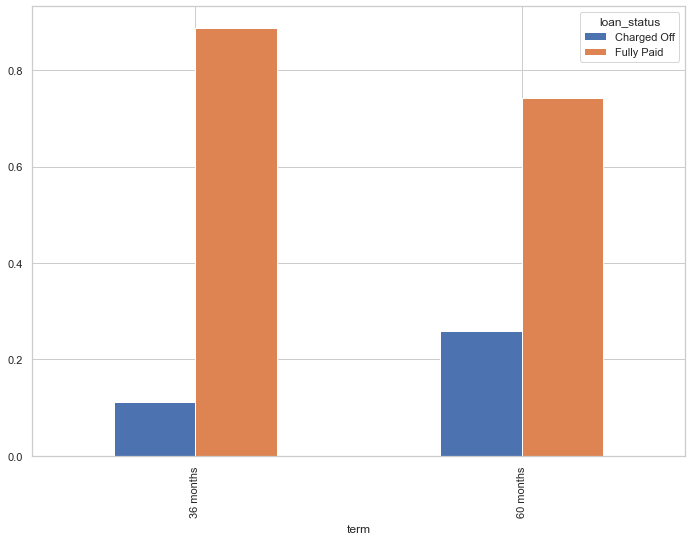

------------- grade --------------


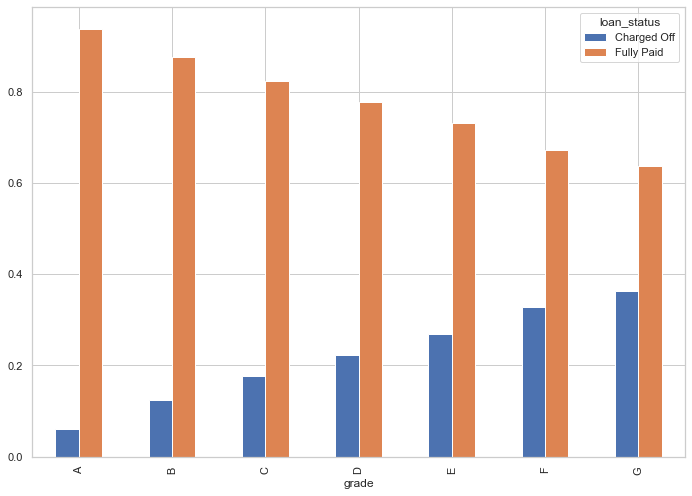

------------- sub_grade --------------


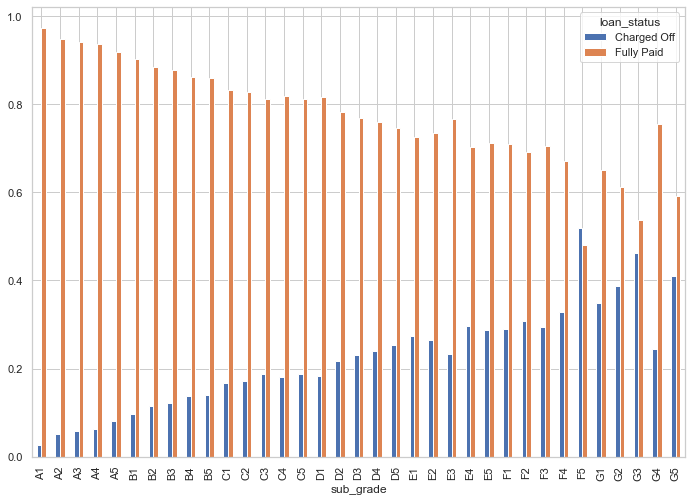

------------- emp_length --------------


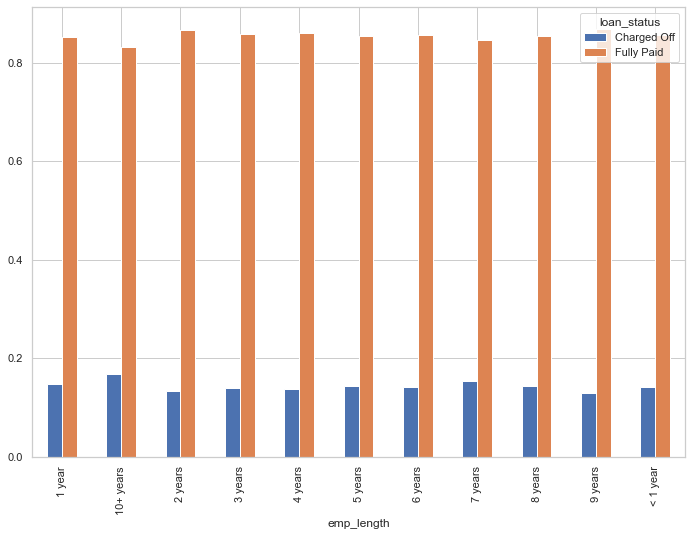

------------- home_ownership --------------


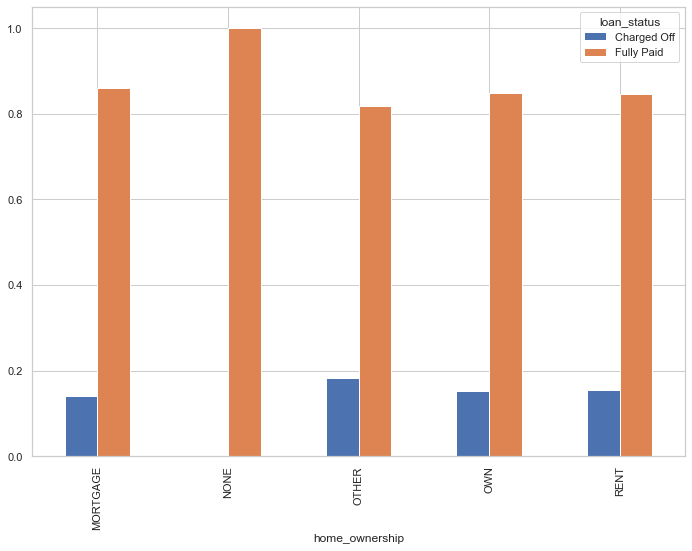

------------- verification_status --------------


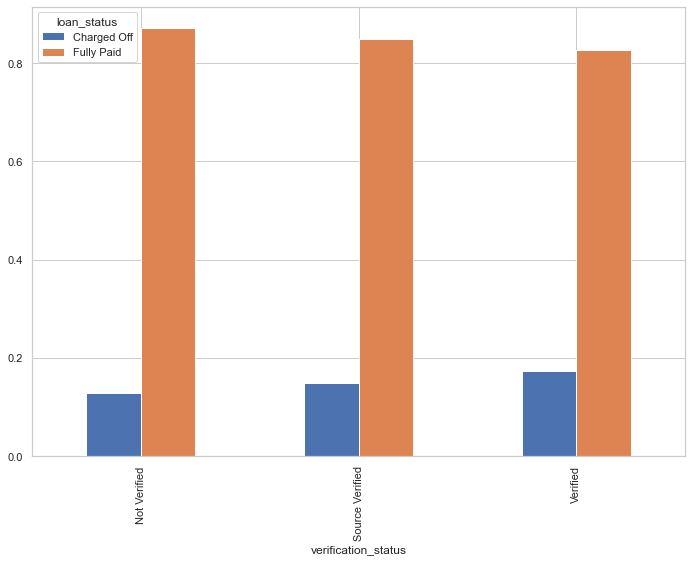

------------- purpose --------------


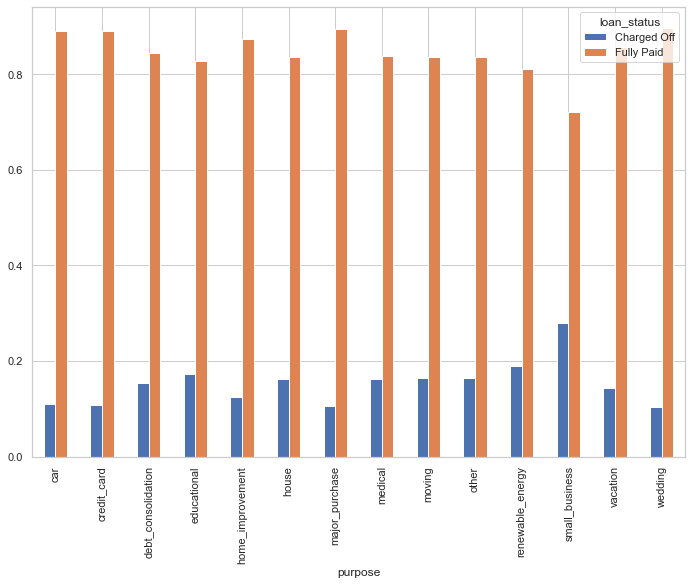

------------- addr_state --------------


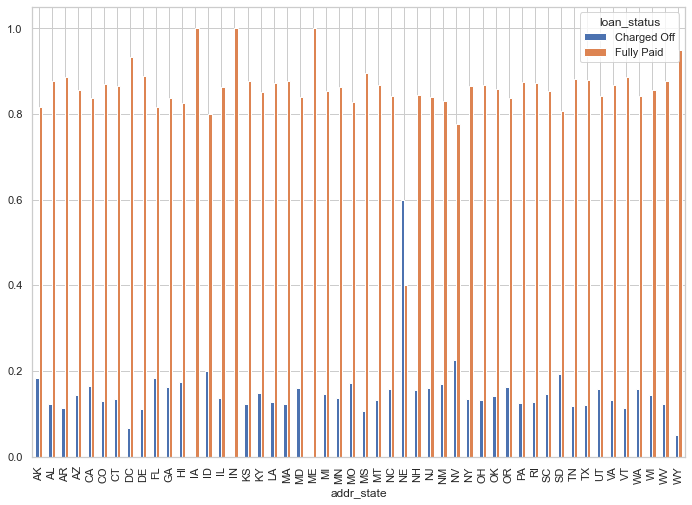

------------- issue_d_month --------------


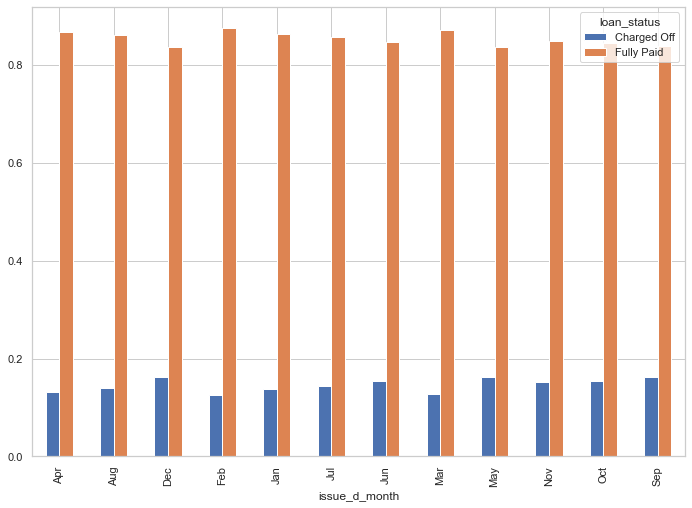

------------- issue_d_year --------------


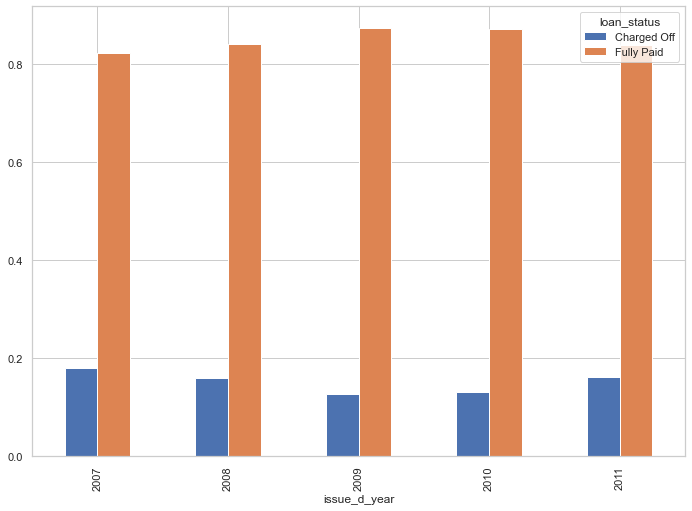

In [187]:
# BiVariate Analysis:
## We try to visualize the impact of one variable on loan_status and find the relationship among them
## Categorical Variables
for i in categorical_cols:
    if (i == "loan_status"): 
        continue
    print("-------------", i, "--------------")
    #print(final_loan_data.groupby(i)['loan_status'].value_counts().unstack())
    final_loan_data.groupby(i)['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=False)
    plt.show()

## Observations: 

1. Loan_status vs Loan term: We have 2 terms (36 months, 60 months). We see that the percentage of loans that are "Charged off" is much higher for longer term.
2. Loan_status vs Grade: Percentage of loans getting "Charged Off" increases as the Grade decreases from A to G.
3. Loan_status  vs sub-grade: Similar trend is seen for sub-grades as well, with some exceptions, that percentage of loans getting "Charged off" increases as the sub-grade decreases (A1 to G5)
4. Loan_status vs Employment_length: Employee length doesn't have a clear trend wrt. loan status
5. Loan_status vs Home_status: Home status doesn't have a clear trend wrt loan_status
6. Loan_status vs addr_state: Percentage of loans "Charged off" is highest in state - 'NE' (Nebraska)
7. Loan_status vs issue_month: Percentage of loans "Charged off" is highest for month December. Then September and May.
8. Loan_status vs issue_year:  No clear trend on percentage of loans "Charged off" over year
9. Loan_status vs purpose: Percentage of loans "Charged off" is highest for purpose 'Small Business'.

## Multi-Variate Analysis:

### loan amount vs interest rate

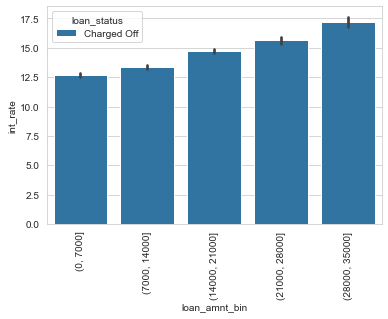

In [349]:
#loan amount vs interest rate
sns.barplot(data =df_chargedOffOnly,x="loan_amnt_bin", y="int_rate", hue ="loan_status")
plt.xticks(rotation=90)
plt.show()

#### From above we can see, customer who is applying for loan with amount 28000 to 35000 and interest between 15% to 17.5% is having higher chance to default

### loan amount vs installment

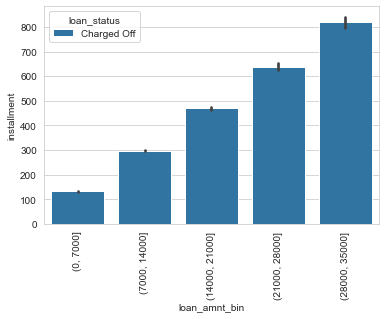

In [350]:
#loan amount vs installment
sns.barplot(data =df_chargedOffOnly,x="loan_amnt_bin", y="installment", hue ="loan_status")
plt.xticks(rotation=90)
plt.show()

#### From above we can see, customer who is applying for loan with amount 28000 to 35000 and installment above 800 is having higher chance to default

### purpose vs interest rate

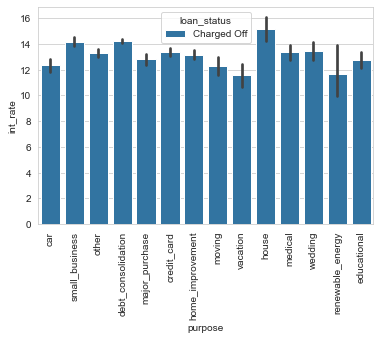

In [351]:
#purpose vs interest rate
sns.barplot(data =df_chargedOffOnly,x="purpose", y="int_rate", hue ="loan_status")
plt.xticks(rotation=90)
plt.show()

#### From above we can see,  customer who is applying for "home loan" &  interest between 14% to 16% is having higher chance to default

### Grade vs interest rate

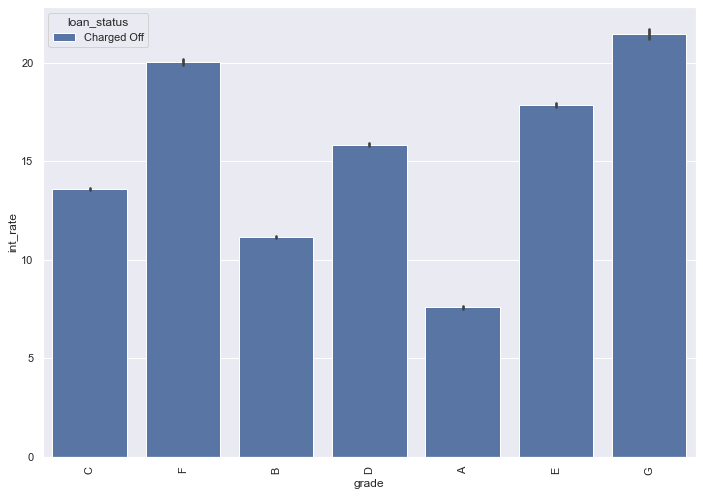

In [129]:
#grade vs interest rate
sns.barplot(data =df_chargedOffOnly,x="grade", y="int_rate", hue ="loan_status")
plt.xticks(rotation=90)
plt.show()

#### From above we can see,  customer who is applying for Grade "G" &  interest above 20% is having higher chance to default

### home_ownership vs loan interest rate

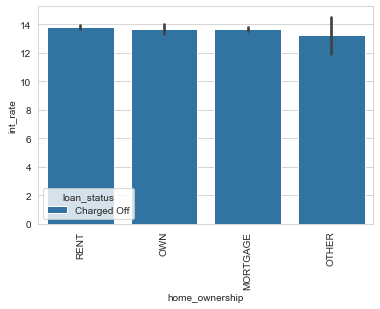

In [352]:
#home_ownership vs loan interest rate
sns.barplot(data =df_chargedOffOnly,x="home_ownership", y="int_rate", hue ="loan_status")
plt.xticks(rotation=90)
plt.show()

#### does not much help for analysis

### Home Ownership vs loan amount

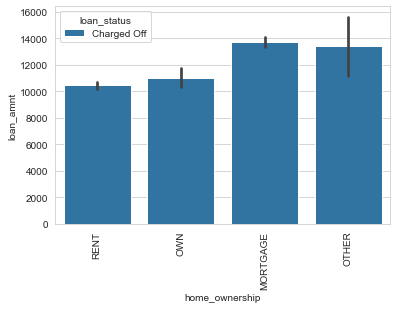

In [353]:
#home_ownership vs loan amount
sns.barplot(data =df_chargedOffOnly,x="home_ownership", y="loan_amnt", hue ="loan_status")
plt.xticks(rotation=90)
plt.show()

#### From above we can see MORTGAGE loan having loan amount between 12000 to 14000 has higher chance of defaulting

## Observation:
- From above we can see, customer who is applying for loan with amount 28000 to 35000 and installment above 800 is having higher chance to default
- customer who is applying for Grade "G" &  interest above 20% is having higher chance to default
- customer who is applying for "home loan" &  interest between 14% to 16% is having higher chance to default
- From above we can see MORTGAGE loan having loan amount between 12000 to 14000 has higher chance of defaulting